# TRITON — EFT & Bayesian Uncertainty Quantification

This notebook collects the numerical results produced by the TRITON code (three-body Faddeev solver) and performs a Bayesian uncertainty quantification (UQ) of EFT truncation errors order-by-order.

**Workflow**
1. Run TRITON (Fortran) to obtain binding energies at a chosen EFT order and regulator setup.
2. Define the EFT expansion parameter $ Q = p_{\mathrm{typ}}/\Lambda_b $.
3. Build a Bayesian predictive distribution for the observable at the given order.
4. Report credible intervals and produce plots.

**Observable**
- Triton binding energy $B$ (MeV).


## Theoretical background and references

The EFT truncation-error model and Bayesian uncertainty quantification implemented in this notebook are based on the following references:

- R. J. Furnstahl, N. Klco, D. R. Phillips, K. Wesolowski, *Quantifying truncation errors in effective    field theory*, Phys. Rev. C **92**, 024005 (2015).

- R. J. Furnstahl, D. R. Phillips, K. Wesolowski, *A recipe for EFT uncertainty quantification*, J. Phys. G **42**, 034028 (2015).

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Inputs (from TRITON and EFT conventions)

- $B_{\mathrm{LO}}$: computed by TRITON (Fortran output).
- $p_{\mathrm{typ}}$: typical momentum scale for the system (chosen/estimated).
- $\Lambda_b$: EFT breakdown scale (chosen/assumed).
- $Q = p_{\mathrm{typ}}/\Lambda_b$.

In [14]:
# --- TRITON output (LO) ---
B_LO = 11.746060  # MeV (from TRITON run)

# --- EFT scales used in the analysis ---
mN = 939.0 #MeV
p_typ = (B_LO*mN)**0.5  # MeV
Lambda_b = 600.0    # MeV

Q = p_typ / Lambda_b

print("B_LO =", B_LO, "MeV")
print("p_typ =", p_typ, "MeV")
print("Lambda_b =", Lambda_b, "MeV")
print("Q =", Q)

B_LO = 11.74606 MeV
p_typ = 105.02166605039172 MeV
Lambda_b = 600.0 MeV
Q = 0.1750361100839862


In [7]:
assert 0 < Q < 1, "Q should be between 0 and 1 for a convergent EFT expansion assumption."
print(f"Q = {Q:.6f}")

Q = 0.175036


## Bayesian truncation error model at LO (Gaussian)

At LO we model the unknown higher-order corrections as a random variable.

A minimal Gaussian model assumes: $B = B_{\mathrm{LO}} + \Delta_{\mathrm{trunc}}, \Delta_{\mathrm{trunc}} \sim \mathcal{N}(0,\sigma_{\mathrm{LO}}^2).$

A common EFT-motivated estimate is: $\sigma_{\mathrm{LO}} \equiv |B_{\mathrm{LO}}|\, Q, $
i.e. the next-order correction is expected to be of relative size \(Q\).

In [15]:
sigma_LO = abs(B_LO) * Q**2
print("sigma_LO =", sigma_LO, "MeV")

sigma_LO = 0.3598715557407234 MeV


In [16]:
# Gaussian central credible intervals:
# 68% ~ ±1 sigma
# 95% ~ ±1.96 sigma

CI68 = (B_LO - 1.0*sigma_LO,  B_LO + 1.0*sigma_LO)
CI95 = (B_LO - 1.96*sigma_LO, B_LO + 1.96*sigma_LO)

print(f"B_LO = {B_LO:.6f} MeV")
print(f"sigma_LO = {sigma_LO:.6f} MeV")
print(f"68% CI ~ [{CI68[0]:.6f}, {CI68[1]:.6f}] MeV")
print(f"95% CI ~ [{CI95[0]:.6f}, {CI95[1]:.6f}] MeV")

B_LO = 11.746060 MeV
sigma_LO = 0.359872 MeV
68% CI ~ [11.386188, 12.105932] MeV
95% CI ~ [11.040712, 12.451408] MeV


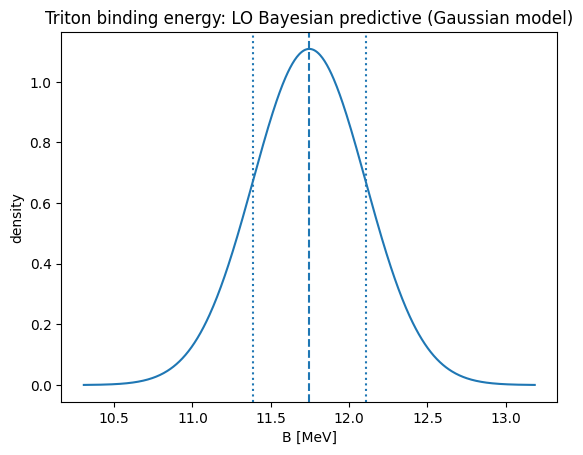

In [17]:
# plot a Gaussian predictive distribution
xs = np.linspace(max(0, B_LO - 4*sigma_LO), B_LO + 4*sigma_LO, 600)
pdf = (1/(sigma_LO*np.sqrt(2*np.pi))) * np.exp(-0.5*((xs - B_LO)/sigma_LO)**2)

plt.figure()
plt.plot(xs, pdf)
plt.axvline(B_LO, linestyle="--")
plt.axvline(CI68[0], linestyle=":")
plt.axvline(CI68[1], linestyle=":")
plt.title("Triton binding energy: LO Bayesian predictive (Gaussian model)")
plt.xlabel("B [MeV]")
plt.ylabel("density")
plt.show()

## Interpretation (LO)

- TRITON provides a deterministic LO prediction $B_{\mathrm{LO}}$.
- EFT tells us that missing higher-order contributions scale like powers of $Q$.
- The Bayesian model converts that expectation into a predictive distribution for the true value of $B$,
  yielding credible intervals (68%, 95%) interpreted as truncation uncertainty bands.

## Next steps (NLO, NNLO, ...)

When higher-order TRITON results become available:
- Add $B_{\mathrm{NLO}}, B_{\mathrm{NNLO}}, \dots$.
- Update the truncation model: $B = B_k + \sum_{n=k+1}^{\infty} c_n Q^n$
  with priors on the coefficients $c_n$.
- Infer posteriors for truncation error given the observed order-by-order pattern.